<a href="https://colab.research.google.com/github/comandi1969/AIFFEL_Online_Quest/blob/main/DL_Master/%EB%94%A5%ED%95%9C%EB%81%9D_9%EC%9E%A5_%ED%8C%A8%EC%85%98_MNIST_%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

4422102/4422102 [==============================] - 0s 0us/step
전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [2]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [3]:
x_train = x_train / 255. # 정규화
x_val = x_val / 255.
x_test = x_test / 255.

In [4]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 [==============================] - 4s 34ms/step - loss: 2.1945 - accuracy: 0.3005 - val_loss: 2.0515 - val_accuracy: 0.4073
Epoch 2/60
83/83 [==============================] - 2s 26ms/step - loss: 1.9275 - accuracy: 0.5623 - val_loss: 1.8203 - val_accuracy: 0.5402
Epoch 3/60
83/83 [==============================] - 2s 29ms/step - loss: 1.7220 - accuracy: 0.6262 - val_loss: 1.6366 - val_accuracy: 0.6082
Epoch 4/60
83/83 [==============================] - 2s 29ms/step - loss: 1.5602 - accuracy: 0.6545 - val_loss: 1.4943 - val_accuracy: 0.6311
Epoch 5/60
83/83 [==============================] - 4s 48ms/step - loss: 1.4323 - accuracy: 0.6737 - val_loss: 1.3794 - val_accuracy: 0.6784
Epoch 6/60
83/83 [==============================] - 3s 31ms/step - loss: 1.3300 - accuracy: 0.6880 - val_loss: 1.2863 - val_accuracy: 0.6835
Epoch 7/60
83/83 [==============================] - 2s 29ms/step - loss: 1.2473 - accuracy: 0.6980 - val_loss: 1.2110 - val_accuracy: 0.7006
Epoch 8/60
83

In [7]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

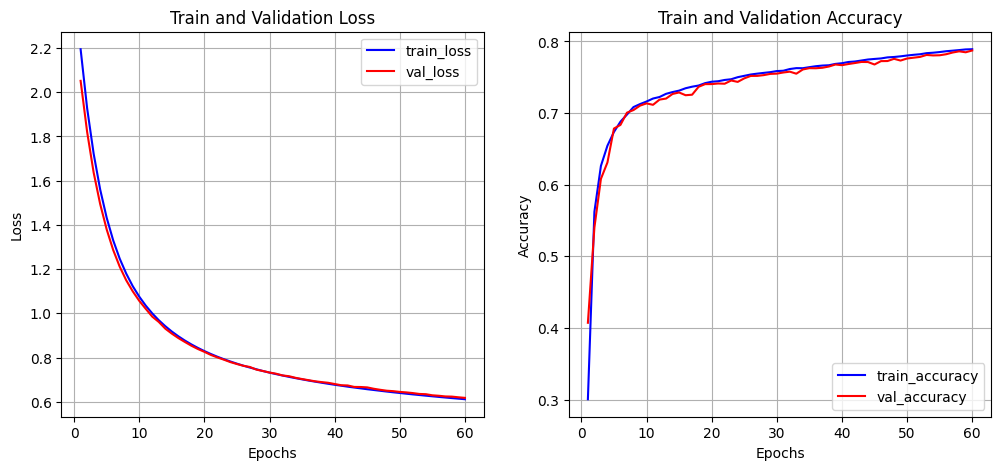

In [9]:
import matplotlib.pyplot as plt
import numpy as np
show_history(history)

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6308 - accuracy: 0.7808


[0.6307934522628784, 0.7807999849319458]

In [11]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

In [19]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

In [20]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 [==============================] - 1s 3ms/step
[1.4739292e-02 9.3844646e-01 5.4258672e-03 1.7504932e-02 1.6164759e-02
 4.9617611e-05 7.5622336e-03 1.9679048e-05 6.3245592e-05 2.4044934e-05]
1
Trouser


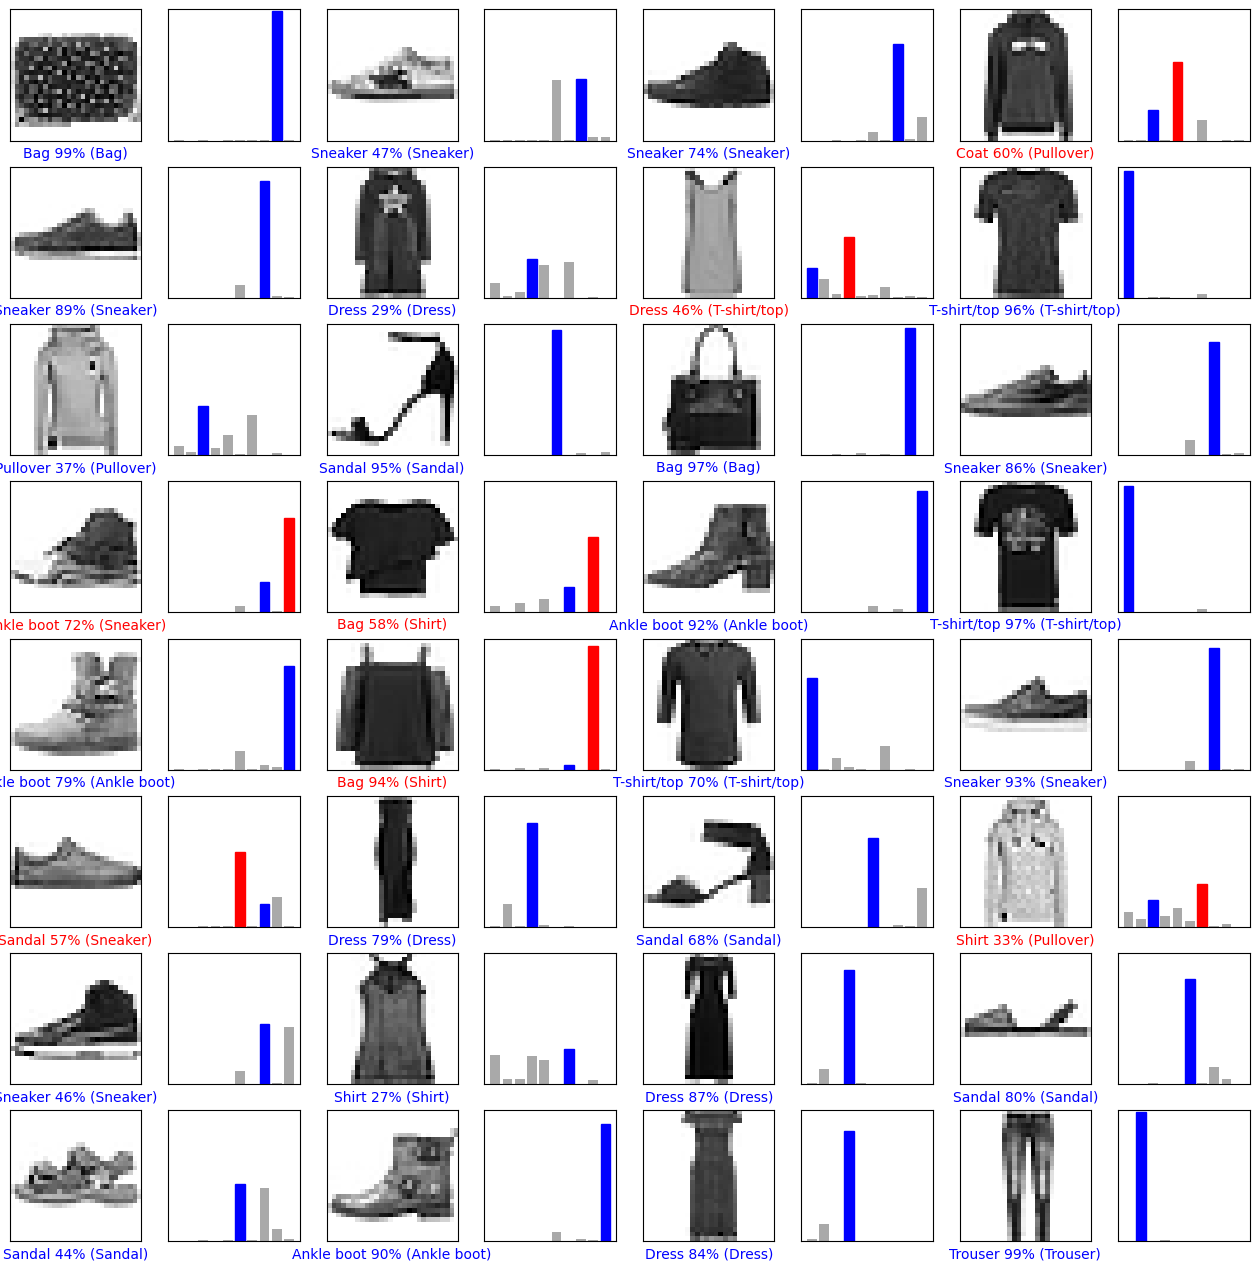

In [21]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [22]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.75      0.78      0.77      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.65      0.67      0.66      1000
       Dress       0.78      0.83      0.80      1000
        Coat       0.65      0.67      0.66      1000
      Sandal       0.83      0.86      0.84      1000
       Shirt       0.50      0.42      0.46      1000
     Sneaker       0.86      0.83      0.85      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.87      0.92      0.89      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



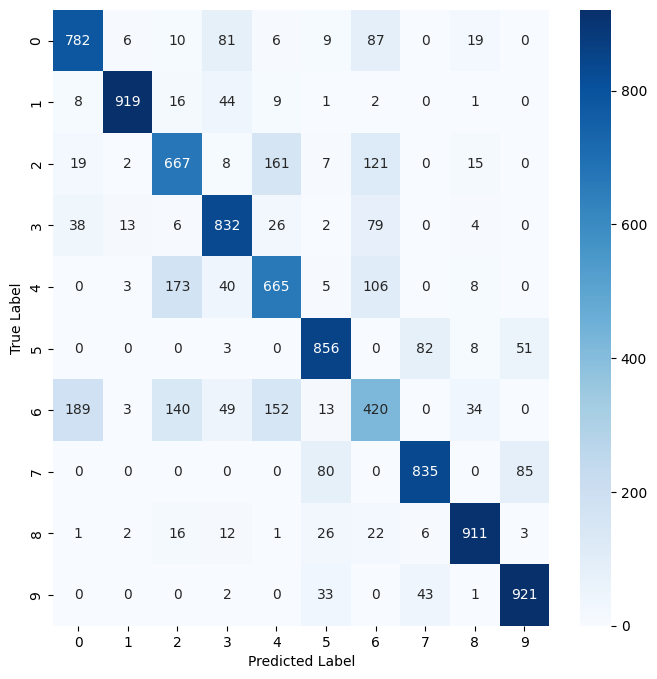

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [24]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.5969 - accuracy: 0.7921 - val_loss: 0.5864 - val_accuracy: 0.7967
Epoch 2/60
1313/1313 [==============================] - 9s 7ms/step - loss: 0.5683 - accuracy: 0.8025 - val_loss: 0.5623 - val_accuracy: 0.8069
Epoch 3/60
1313/1313 [==============================] - 12s 9ms/step - loss: 0.5468 - accuracy: 0.8104 - val_loss: 0.5485 - val_accuracy: 0.8093
Epoch 4/60
1313/1313 [==============================] - 10s 8ms/step - loss: 0.5297 - accuracy: 0.8160 - val_loss: 0.5324 - val_accuracy: 0.8141
Epoch 5/60
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5162 - accuracy: 0.8194 - val_loss: 0.5194 - val_accuracy: 0.8194
Epoch 6/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.5050 - accuracy: 0.8235 - val_loss: 0.5093 - val_accuracy: 0.8242
Epoch 7/60
1313/1313 [==============================] - 8s 6ms/step - loss: 0.4954 - accuracy: 0.8263 - val_loss: 0.5021 - val_accurac

In [ ]:
show_history(history)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history2 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

In [ ]:
diff_history(history, history2)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
# 직접 코드를 입력해보세요
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
diff_history(history, history3)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
from tensorflow.keras import models, layers, utils, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2()))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history4 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
diff_history(history, history4)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
from tensorflow.keras import models, layers, optimizers, utils, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
#model.add(layers.Dropout(0.5)) # 드롭아웃 추가
#model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2()))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5)) # 드롭아웃 추가
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history5 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
diff_history(history, history5)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
from tensorflow.keras import models, layers, optimizers, utils, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dropout(0.5)) # 드롭아웃 추가
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history6 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
diff_history(history, history6)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
from tensorflow.keras import models, layers, optimizers, utils, regularizers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5)) # 드롭아웃 추가
model.add(layers.BatchNormalization()) # 배치 정규화
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history7 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

In [ ]:
diff_history(history, history7)

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [ ]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()